<a href="https://colab.research.google.com/github/anthonybrown0528/csc-442-course-project/blob/main/notebook/hw7/individual_analysis_model_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Individual Analysis

**Business Goal:** The goal of this project is to predict the popularity and audience satisfaction of films that are available on Netflix given characteristics of the film by analyzing the relationship between those film characteristics and the IMDb score and number of votes for the particular film. The unit of analysis will be Netflix films.

**Subgoal:** The subgoal for this task is to analyze the relationship between a film’s IMDb score and a short summary of the film’s plot by building a predictive model where the score is the response variable and a vector representation of the film description compose the explanatory variables.

**Note:** This notebook includes many different models that each use either genre of description information to make predictions. The results for description and genre are each summarized at the end of their respective sections.

### Columns Considered for this Analysis

| Field | Description | Data Type | Attribute Type |
| :---- | :---- | :---- | :---- |
| title | Title of the film | \> 10 unique values, text | nominal |
| release\_year | year in which the film was released | integer | interval |
| description | short synopsis of the film | \> 10 unique values, text | nominal |
| genre | category associated with a film | \> 10 unique values, text | nominal |
| imdb\_score | IMDb rating | continuous | interval |


## Description Analysis

In [112]:
import pandas as pd

In [113]:
# Load the cleaned dataset
filepath = 'https://raw.githubusercontent.com/anthonybrown0528/csc-442-course-project/refs/heads/main/dataset/clean/hw6/netflix_film_imdb_scores_cleaned_descriptions_df.csv'
df = pd.read_csv(filepath)

In [114]:
df.head()

,title,description_x,release_year,runtime,imdb_id,imdb_score,imdb_votes,show_id,type,director,...,country,date_added,age_certification,num_releases,listed_in,description_y,num_listed_in,first_cast,cast_freq_mean,genre_freq_mean
0,Monty Python and the Holy Grail,King Arthur accompany squire recruit Knights R...,1975,91,tt0071853,8.2,530877,s4218,Movie,"Terry Gilliam, Terry Jones",...,United Kingdom,"January 2, 2019",PG,1,"Action & Adventure, Classic Movies, Comedies",The Monty Python comedy clan skewers King Arth...,3,Graham Chapman,10.888889,831.000000
1,My Fair Lady,snobbish phonetics professor agree wager take ...,1964,170,tt0058385,7.8,94121,s1127,Movie,George Cukor,...,United States,"April 1, 2021",G,1,"Classic Movies, Music & Musicals",When a Cockney flower girl takes elocution les...,2,Audrey Hepburn,1.083333,203.500000
2,The Blue Lagoon,Two small child ship cook survive shipwreck fi...,1980,104,tt0080453,5.8,69053,s176,Movie,Randal Kleiser,...,United States,"September 1, 2021",R,1,"Dramas, Romantic Movies","Two shipwrecked children, stranded for years o...",2,Brooke Shields,1.375000,1446.500000
3,Bonnie and Clyde,In 1930s bore waitress Bonnie Parker fall love...,1967,110,tt0061418,7.7,111189,s6359,Movie,Arthur Penn,...,United States,"January 1, 2021",R,1,"Action & Adventure, Classic Movies, Dramas","Bonnie Parker and Clyde Barrow are young, in l...",3,Warren Beatty,1.777778,1076.333333
4,The Guns of Navarone,team allied saboteur assign impossible mission...,1961,158,tt0054953,7.5,50150,s178,Movie,J. Lee Thompson,...,"United Kingdom, United States","September 1, 2021",TV-14,1,"Action & Adventure, Classic Movies","During World War II, British forces launch an ...",2,Gregory Peck,1.300000,459.500000


In [115]:
# Select only a portion of the columns for analysis
column_subset = ['title', 'release_year', 'listed_in', 'description_x', 'imdb_score']
query_df = df[column_subset]

query_df

,title,release_year,listed_in,description_x,imdb_score
0,Monty Python and the Holy Grail,1975,"Action & Adventure, Classic Movies, Comedies",King Arthur accompany squire recruit Knights R...,8.2
1,My Fair Lady,1964,"Classic Movies, Music & Musicals",snobbish phonetics professor agree wager take ...,7.8
2,The Blue Lagoon,1980,"Dramas, Romantic Movies",Two small child ship cook survive shipwreck fi...,5.8
3,Bonnie and Clyde,1967,"Action & Adventure, Classic Movies, Dramas",In 1930s bore waitress Bonnie Parker fall love...,7.7
4,The Guns of Navarone,1961,"Action & Adventure, Classic Movies",team allied saboteur assign impossible mission...,7.5
...,...,...,...,...,...
2472,Myriam Fares: The Journey,2021,"Documentaries, International Movies, Music & M...",From pregnancy album preparation Lebanese sing...,2.3
2473,The Tambour of Retribution,2021,"Dramas, International Movies, Romantic Movies",son swordsman fall love daughter Tagaga social...,6.9
2474,Pitta Kathalu,2021,"International TV Shows, TV Dramas",Four different woman four journey love betraya...,5.1
2475,Loyiso Gola: Unlearning,2021,Stand-Up Comedy,South African comedian Loyiso Gola serve filte...,5.9


In [116]:
# Split the data into a training and test set with a 70/30 split
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(query_df, test_size=0.3, random_state=42)

In [117]:
# Used to store the performance of each model
model_scores = []

In [118]:
# Denote the explanatory and response variables
features = ['title', 'release_year', 'genre', 'description']
response = 'imdb_score'

In [119]:
def separate_genre_df(data):
  """
  Construct a dataframe where each entry corresponds to a (movie, genre) pair
  """

  movie_genre_map = {
      'title': [],
      'release_year': [],
      'genre': [],
      'description': [],
      'imdb_score': []
  }

  for _, row in data.iterrows():

    # Split the genres which are separated by commas
    genres = row['listed_in'].split(',')

    # Add a row for the current movie for each associated genre
    for genre in genres:
      movie_genre_map['title'].append(row['title'])
      movie_genre_map['release_year'].append(row['release_year'])
      movie_genre_map['genre'].append(genre.strip())
      movie_genre_map['description'].append(row['description_x'].strip())
      movie_genre_map['imdb_score'].append(row['imdb_score'])


  movie_genre_df = pd.DataFrame(movie_genre_map)

  # Exclude international movies and international TV shows as categories
  movie_genre_df = movie_genre_df[movie_genre_df['genre'] != 'International Movies']
  movie_genre_df = movie_genre_df[movie_genre_df['genre'] != 'International TV Shows']

  movie_genre_df

  return movie_genre_df

data_cleaned_df = separate_genre_df(train_set)

# Separate the data into a dataframe of features and one for the target variable
feature_df = data_cleaned_df[features]
target_df = data_cleaned_df[response]

# Identify the number of genres represented
data_cleaned_df['genre'].nunique()

39

In [120]:
X_train = data_cleaned_df[features]
y_train = data_cleaned_df['imdb_score']

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [123]:
"""
Train and validate a model using film descriptions as features transformed by
the classification probabilities of a Naive Bayes classifier. The final model
in the pipeline is a linear regression model without regularization. The words
are transformed using TF vectorization (CountVectorizer).
"""

# use 5-fold cross validation
n_splits = 5

cv = KFold(n_splits=n_splits)
cv_scores = np.zeros(n_splits)
errors = np.zeros(n_splits)

for index, (train, val) in enumerate(cv.split(X_train, y_train)):
  X_train_train = X_train.iloc[train]
  y_train_train = y_train.iloc[train]

  X_train_val = X_train.iloc[val]
  y_train_val = y_train.iloc[val]

  # Set up a pipeline for feature extraction
  genre_probabilities_pipeline = Pipeline([('vectorizer', CountVectorizer(stop_words='english')), ('topic_model', MultinomialNB())])
  genre_probabilities_pipeline = genre_probabilities_pipeline.fit(X=X_train_train['description'], y=X_train_train['genre'])

  # Set up a pipeline for regression
  X_train_tmp = X_train_train.copy()

  X_train_tmp['imdb_score'] = y_train_train
  X_train_tmp = X_train_tmp.drop_duplicates(subset=['title', 'release_year'])

  X_train_train = X_train_tmp[features]
  y_train_train = X_train_tmp['imdb_score']

  compressed_feature = genre_probabilities_pipeline.predict_proba(X=X_train_train['description'])

  genre_weights_score_pipeline = Pipeline([('regressor', LinearRegression())])

  genre_weights_score_pipeline = genre_weights_score_pipeline.fit(X=compressed_feature, y=y_train_train)

  # Validate the final model

  X_val_tmp = X_train_val.copy()

  X_val_tmp['imdb_score'] = y_train_val
  X_val_tmp = X_val_tmp.drop_duplicates(subset=['title', 'release_year'])

  X_train_val = X_val_tmp[features]
  y_train_val = X_val_tmp['imdb_score']

  compressed_feature = genre_probabilities_pipeline.predict_proba(X=X_train_val['description'])
  score = genre_weights_score_pipeline.score(X=compressed_feature, y=y_train_val)

  # Record the model score
  cv_scores[index] = score
  errors[index] = mean_squared_error(y_train_val, genre_weights_score_pipeline.predict(compressed_feature))

In [124]:
# Find the R2 score of the model
print(cv_scores)
cv_scores.mean()

model_scores.append(cv_scores.mean())

[ 0.0177179   0.05163403  0.03340853 -0.04583184  0.01970477]


In [125]:
# Find the error in the model
print(errors)
errors.mean()

[1.4098377  1.2867272  1.38155373 1.26159287 1.28436292]


np.float64(1.3248148818026286)

In [126]:
"""
Train and validate a model using film descriptions as features transformed by
the classification probabilities of a Naive Bayes classifier. The final model
in the pipeline is a linear regression model without regularization. The words
are transformed using TF-IDF vectorization (TfidfVectorizer).
"""

# use 5-fold cross validation
n_splits = 5

cv = KFold(n_splits=n_splits)
cv_scores = np.zeros(n_splits)

for index, (train, val) in enumerate(cv.split(X_train, y_train)):
  X_train_train = X_train.iloc[train]
  y_train_train = y_train.iloc[train]

  X_train_val = X_train.iloc[val]
  y_train_val = y_train.iloc[val]

  # Set up a pipeline for feature extraction
  genre_probabilities_pipeline = Pipeline([('vectorizer', TfidfVectorizer(stop_words='english')), ('topic_model', MultinomialNB())])
  genre_probabilities_pipeline = genre_probabilities_pipeline.fit(X=X_train_train['description'], y=X_train_train['genre'])

  # Set up a pipeline for regression
  X_train_tmp = X_train_train.copy()

  X_train_tmp['imdb_score'] = y_train_train
  X_train_tmp = X_train_tmp.drop_duplicates(subset=['title', 'release_year'])

  X_train_train = X_train_tmp[features]
  y_train_train = X_train_tmp['imdb_score']

  compressed_feature = genre_probabilities_pipeline.predict_proba(X=X_train_train['description'])

  genre_weights_score_pipeline = Pipeline([('regressor', LinearRegression())])

  genre_weights_score_pipeline = genre_weights_score_pipeline.fit(X=compressed_feature, y=y_train_train)

  genres = X_train['genre'].unique()

  # Validate the final model

  X_val_tmp = X_train_val.copy()

  X_val_tmp['imdb_score'] = y_train_val
  X_val_tmp = X_val_tmp.drop_duplicates(subset=['title', 'release_year'])

  X_train_val = X_val_tmp[features]
  y_train_val = X_val_tmp['imdb_score']

  compressed_feature = genre_probabilities_pipeline.predict_proba(X=X_train_val['description'])
  score = genre_weights_score_pipeline.score(X=compressed_feature, y=y_train_val)

  # Record the model score
  cv_scores[index] = score
  errors[index] = mean_squared_error(y_train_val, genre_weights_score_pipeline.predict(compressed_feature))

<Axes: xlabel='genre', ylabel='coef'>

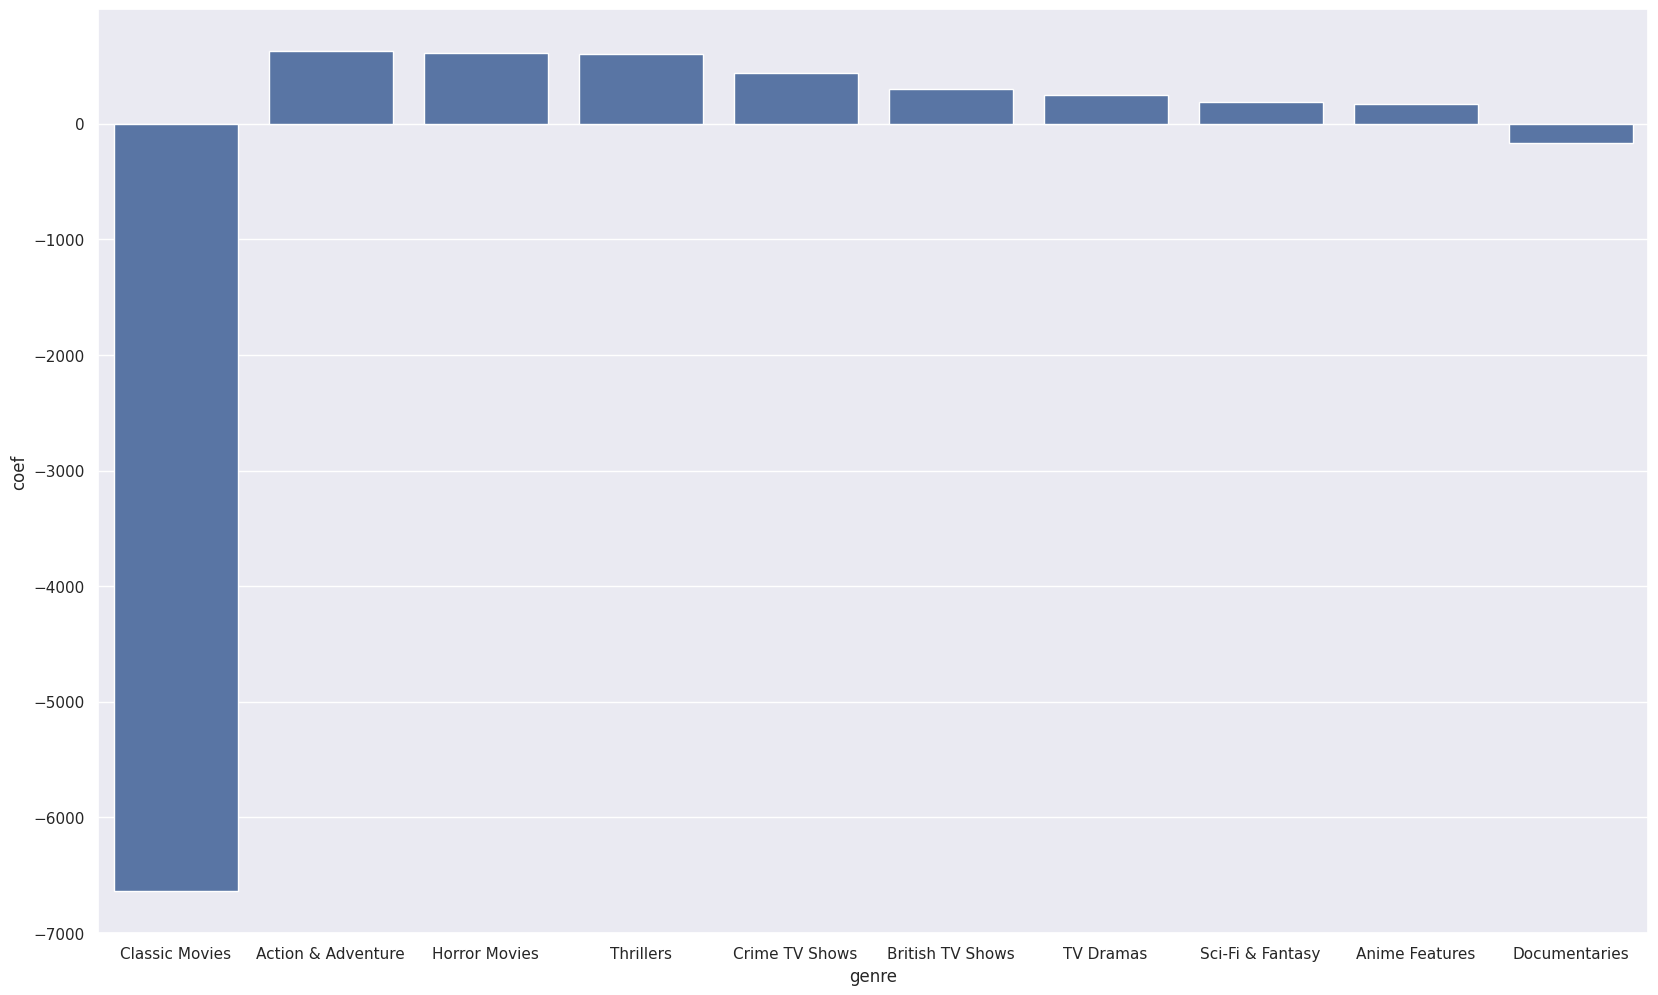

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the coefficients for each genre
coefficients = genre_weights_score_pipeline['regressor'].coef_
words = genres

results_df = {
    'coef': coefficients,
    'genre': words,
}

# Find the 10 most significant genre given by the cluster of words. The
# significance is determined by the magnitude of the coefficients in the
# linear regression model
results_df = pd.DataFrame(results_df)
results_df['abs_coef'] = np.abs(results_df['coef'])
significant_words = results_df.sort_values(by='abs_coef', ascending=False).iloc[:10]

plt.figure(figsize=(20,12))  # set plot size (denoted in inches) Source: https://stackoverflow.com/questions/59447378/sklearn-plot-tree-plot-is-too-small
sns.barplot(significant_words, x='genre', y='coef')

### Discussion

The results here show that most genres are positively associated with IMDb scores except for Classic movies and Documentaries. However, the cross validation score for this model suggests that the results are not reliable.

In [128]:
# Find the R2 score of the model
print(cv_scores)
cv_scores.mean()

model_scores.append(cv_scores.mean())

[0.05122026 0.06349457 0.02563788 0.05673798 0.05915987]


In [129]:
# Find the error in the model
print(errors)
errors.mean()

[1.36175284 1.27063501 1.39266035 1.13786231 1.23266964]


np.float64(1.2791160329730284)

In [130]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV

In [131]:
"""
Train and validate a model using film descriptions as features transformed by
a generative Latent Dirichlet Allocation model. The final model
in the pipeline is a linear regression model without regularization. The words
are transformed using TF-IDF vectorization (TfidfVectorizer).
"""

# Use 5-fold cross validation
n_splits = 5

cv = KFold(n_splits=n_splits)
cv_scores = np.zeros(n_splits)

# Set up a 3-step pipeline
genre_weights_score_pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('decomposer', LatentDirichletAllocation()),
    ('regressor', LinearRegression())]
)

# Specify the hyperparameters to tune
grid_search = GridSearchCV(genre_weights_score_pipeline, param_grid={
    'vectorizer__stop_words': ['english'],
    'decomposer__n_components': [40]
})

# Train and determine the best set of hyperparameters
grid_search = grid_search.fit(X=X_train['description'], y=y_train)
genre_weights_score_pipeline = grid_search.best_estimator_

# Record the model score
cv_results_df = pd.DataFrame(grid_search.cv_results_)
model_scores.append(float(cv_results_df[cv_results_df['rank_test_score'] == 1]['mean_test_score'].iloc[0]))

cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_decomposer__n_components,param_vectorizer__stop_words,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,5.055891,0.463,0.181193,0.031838,40,english,"{'decomposer__n_components': 40, 'vectorizer__...",-0.00002,-0.007866,0.001099,0.000161,-0.01234,-0.003793,0.005356,1


In [ ]:
"""
Train and validate a model using film descriptions as features without
transforming features after vectorization. The final model in the pipeline is a
linear regression model without regularization. The words are transformed using
TF vectorization (CountVectorizer).
"""

# Use 5-fold cross validation
n_splits = 5

cv = KFold(n_splits=n_splits)
cv_scores = np.zeros(n_splits)

# Set up a 2-step pipeline
genre_weights_score_pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('regressor', LinearRegression())]
)

# Specify the hyperparameters to tune
grid_search = GridSearchCV(genre_weights_score_pipeline, param_grid={
    'vectorizer__stop_words': ['english', None],
    'vectorizer__max_features': [None, 100, 1000],
    'vectorizer__min_df': [1, 0.1, 0.01, 0.001]
})

# Train and determine the best set of hyperparameters
grid_search = grid_search.fit(X=X_train['description'], y=y_train)
genre_weights_score_pipeline = grid_search.best_estimator_

# Record the model score
cv_results_df = pd.DataFrame(grid_search.cv_results_)
model_scores.append(float(cv_results_df[cv_results_df['rank_test_score'] == 1]['mean_test_score'].iloc[0]))

cv_results_df

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-82-f0a4ac569630>", line 28, in <cell line: 0>
    grid_search = grid_search.fit(X=X_train['description'], y=y_train)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py", line 1024, in fit
    self._run_search(evaluate_candidates)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py", line 1571, in _run_search
    evaluate_candidates(ParameterGrid(self.param_grid))
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py", line 970,

In [132]:
# Output the best pipeline with the best set of
# hyperparameters
genre_weights_score_pipeline

Pipeline(steps=[('vectorizer', CountVectorizer(stop_words='english')),
                ('decomposer', LatentDirichletAllocation(n_components=40)),
                ('regressor', LinearRegression())])

In [133]:
"""
Train and validate a model using film descriptions as features without
transforming features after vectorization. The final model in the pipeline is a
linear regression model without regularization. The words are transformed using
TF vectorization (CountVectorizer).
"""

# Use 5-fold cross validation
n_splits = 5

cv = KFold(n_splits=n_splits)
cv_scores = np.zeros(n_splits)

# Set up a 2-step pipeline
genre_weights_score_pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('regressor', LinearRegression())]
)

# Specify the hyperparameters to tune
grid_search = GridSearchCV(genre_weights_score_pipeline, param_grid={
    'vectorizer__stop_words': ['english', None],
    'vectorizer__max_features': [None, 100, 1000],
    'vectorizer__min_df': [1, 0.1, 0.01, 0.001]
})

# Train and determine the best set of hyperparameters
grid_search = grid_search.fit(X=X_train['description'], y=y_train)
genre_weights_score_pipeline = grid_search.best_estimator_

# Record the model score
cv_results_df = pd.DataFrame(grid_search.cv_results_)
model_scores.append(float(cv_results_df[cv_results_df['rank_test_score'] == 1]['mean_test_score'].iloc[0]))

cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_vectorizer__max_features,param_vectorizer__min_df,param_vectorizer__stop_words,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.129543,0.029970,0.018751,0.005763,None,1.000,english,"{'vectorizer__max_features': None, 'vectorizer...",-0.524108,-0.510606,-0.471002,-0.338540,-0.657345,-0.500320,0.102334,18
1,0.184887,0.005342,0.024935,0.000690,None,1.000,None,"{'vectorizer__max_features': None, 'vectorizer...",-0.552223,-0.469194,-0.436135,-0.348244,-0.608719,-0.482903,0.090712,17
2,0.103649,0.001383,0.022122,0.001479,None,0.100,english,"{'vectorizer__max_features': None, 'vectorizer...",0.003285,0.003883,-0.016940,-0.004916,-0.015070,-0.005951,0.008798,4
3,0.106784,0.002422,0.020679,0.000655,None,0.100,None,"{'vectorizer__max_features': None, 'vectorizer...",-0.002922,0.011374,-0.017830,-0.002423,-0.009450,-0.004250,0.009599,1
4,0.078284,0.018196,0.014095,0.001815,None,0.010,english,"{'vectorizer__max_features': None, 'vectorizer...",-0.198899,-0.363475,-0.259156,-0.262632,-0.280805,-0.272993,0.052985,13
5,0.072631,0.004721,0.013125,0.000729,None,0.010,None,"{'vectorizer__max_features': None, 'vectorizer...",-0.419719,-0.438354,-0.350525,-0.410364,-0.308910,-0.385575,0.048316,15
6,0.119604,0.004449,0.015272,0.000804,None,0.001,english,"{'vectorizer__max_features': None, 'vectorizer...",-1.183593,-1.365509,-1.167095,-1.030704,-1.568410,-1.263062,0.186144,20
7,0.112901,0.009740,0.014485,0.000842,None,0.001,None,"{'vectorizer__max_features': None, 'vectorizer...",-1.178894,-1.139894,-0.992849,-0.920450,-1.404493,-1.127316,0.167643,19
8,0.078009,0.004634,0.013716,0.000627,100,1.000,english,"{'vectorizer__max_features': 100, 'vectorizer_...",-0.086020,-0.090940,-0.082138,-0.044080,-0.149791,-0.090594,0.033942,11
9,0.073987,0.004787,0.013411,0.000591,100,1.000,None,"{'vectorizer__max_features': 100, 'vectorizer_...",-0.116901,-0.059092,-0.096263,-0.056015,-0.111204,-0.087895,0.025693,7


In [134]:
# Output the best pipeline with the best set of
# hyperparameters
genre_weights_score_pipeline

Pipeline(steps=[('vectorizer', CountVectorizer(min_df=0.1)),
                ('regressor', LinearRegression())])

### Discussion

The best-scoring set of hyperparameters used a minimum document frequency of 0.1 which means removing some rarely occurring words from the text input improves the quality of the model. The removed tokens may have been text encoding errors, typos, or other artifacts which introduce unimportant information in training set.

In [135]:
"""
Train and validate a model using film descriptions as features without
transforming features after vectorization. The final model in the pipeline is a
linear regression model without regularization. The words are transformed using
TF-IDF vectorization (TfidfVectorizer).
"""

# Use 5-fold cross validation
n_splits = 5

cv = KFold(n_splits=n_splits)
cv_scores = np.zeros(n_splits)

# Set up a 2-step pipeline
genre_weights_score_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('regressor', LinearRegression())]
)

# Specify the hyperparameters to tune
grid_search = GridSearchCV(genre_weights_score_pipeline, param_grid={
    'vectorizer__stop_words': ['english', None],
    'vectorizer__max_features': [None, 100, 1000],
    'vectorizer__min_df': [1, 0.1, 0.01, 0.001]
})

# Train and determine the best set of hyperparameters
grid_search = grid_search.fit(X=X_train['description'], y=y_train)
genre_weights_score_pipeline = grid_search.best_estimator_

# Record the model score
cv_results_df = pd.DataFrame(grid_search.cv_results_)
model_scores.append(float(cv_results_df[cv_results_df['rank_test_score'] == 1]['mean_test_score'].iloc[0]))

cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_vectorizer__max_features,param_vectorizer__min_df,param_vectorizer__stop_words,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.144171,0.004885,0.027482,0.000749,None,1.000,english,"{'vectorizer__max_features': None, 'vectorizer...",-0.234051,-0.183110,-0.242759,-0.195870,-0.328023,-0.236763,0.050838,14
1,0.128785,0.030399,0.023340,0.005054,None,1.000,None,"{'vectorizer__max_features': None, 'vectorizer...",-0.238545,-0.129752,-0.212080,-0.183662,-0.293293,-0.211466,0.054552,13
2,0.063416,0.006556,0.013312,0.001043,None,0.100,english,"{'vectorizer__max_features': None, 'vectorizer...",0.006226,0.005513,-0.017019,-0.003600,-0.011612,-0.004098,0.009194,4
3,0.059543,0.003790,0.012862,0.000861,None,0.100,None,"{'vectorizer__max_features': None, 'vectorizer...",0.006319,0.012823,-0.018184,0.005841,-0.012782,-0.001197,0.012044,1
4,0.065790,0.002928,0.013750,0.000796,None,0.010,english,"{'vectorizer__max_features': None, 'vectorizer...",-0.211667,-0.295399,-0.252364,-0.349283,-0.245364,-0.270815,0.047431,15
5,0.063866,0.001603,0.015052,0.003700,None,0.010,None,"{'vectorizer__max_features': None, 'vectorizer...",-0.370562,-0.341337,-0.303336,-0.529777,-0.309430,-0.370888,0.083017,17
6,0.082198,0.003502,0.015166,0.000427,None,0.001,english,"{'vectorizer__max_features': None, 'vectorizer...",-0.708468,-0.766320,-0.693226,-0.757710,-0.952371,-0.775619,0.092679,20
7,0.081492,0.005842,0.015948,0.001556,None,0.001,None,"{'vectorizer__max_features': None, 'vectorizer...",-0.682845,-0.618381,-0.576478,-0.610404,-0.840569,-0.665735,0.093947,19
8,0.073816,0.002269,0.014739,0.002128,100,1.000,english,"{'vectorizer__max_features': 100, 'vectorizer_...",-0.056413,-0.041343,-0.088572,-0.055244,-0.093671,-0.067049,0.020422,11
9,0.073350,0.005974,0.013388,0.000700,100,1.000,None,"{'vectorizer__max_features': 100, 'vectorizer_...",-0.088286,-0.031247,-0.106103,-0.056519,-0.049486,-0.066328,0.027110,8


In [136]:
# Output the best pipeline with the best set of
# hyperparameters
genre_weights_score_pipeline

Pipeline(steps=[('vectorizer', TfidfVectorizer(min_df=0.1)),
                ('regressor', LinearRegression())])

### Discussion

The best-scoring set of hyperparameters used a minimum document frequency of 0.1 which means removing some rarely occurring words from the text input improves the quality of the model. The removed tokens may have been text encoding errors, typos, or other artifacts which introduce unimportant information in training set. This is similar to the model pipeline using TF vectorization.

<Axes: xlabel='word', ylabel='coef'>

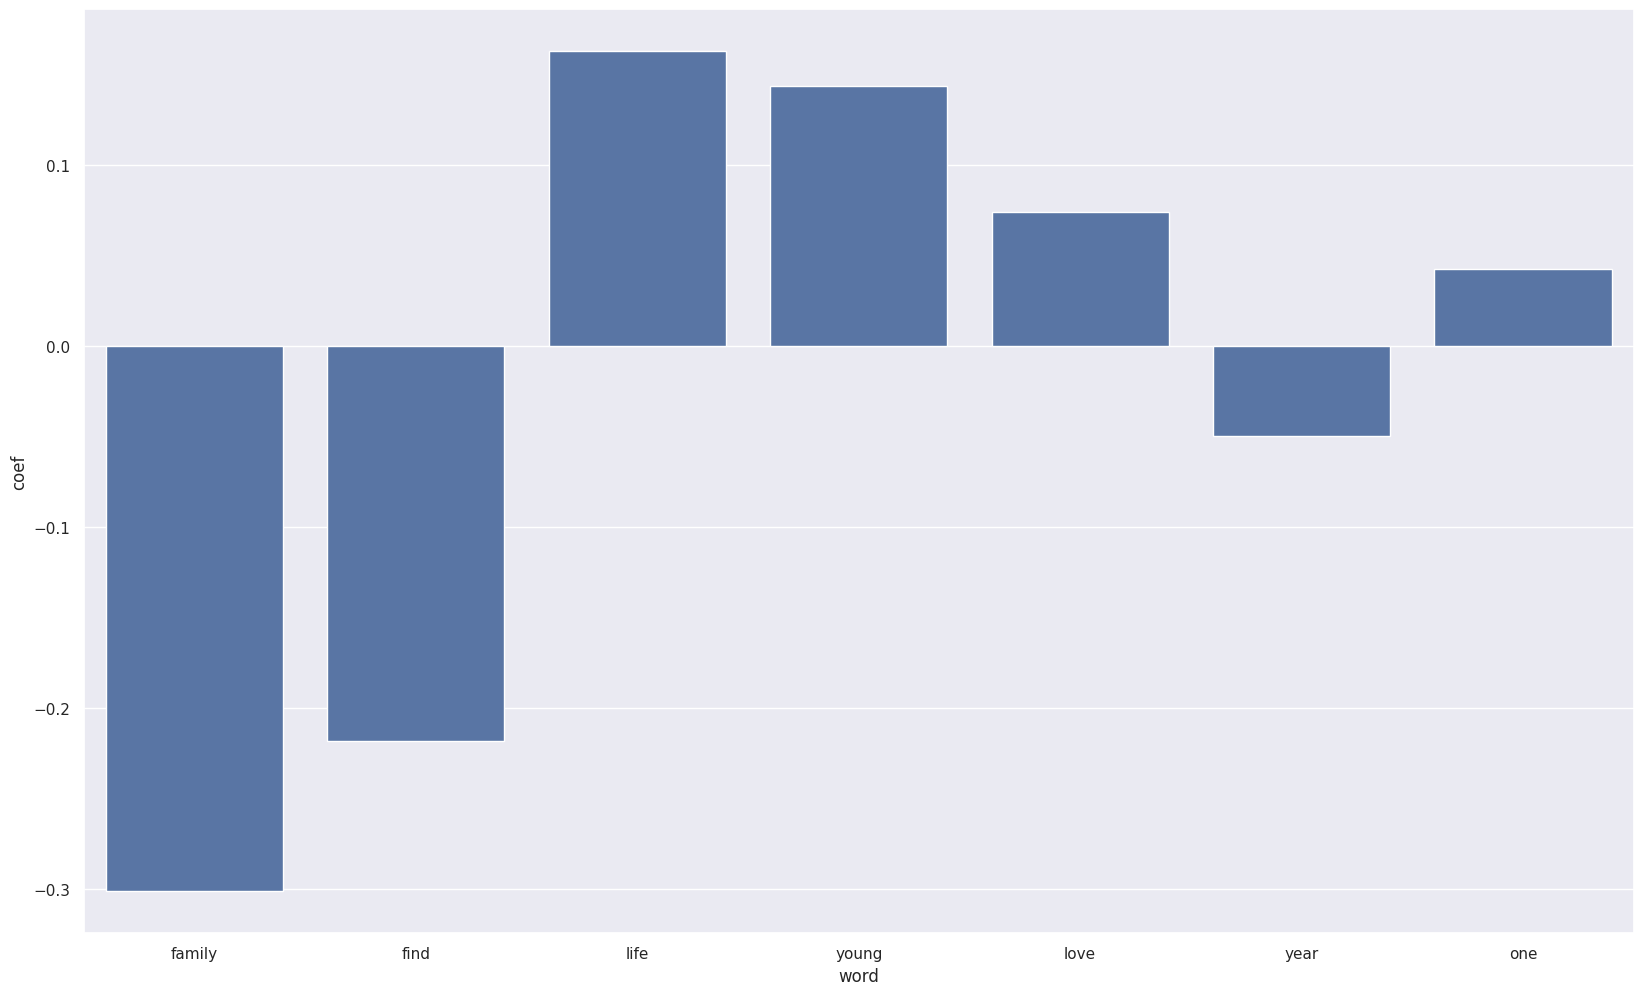

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the coefficients for each genre
coefficients = genre_weights_score_pipeline['regressor'].coef_
words = genre_weights_score_pipeline['vectorizer'].get_feature_names_out()


# Find the most significant words. The significance is determined by the
# magnitude of the coefficients in the linear regression model
results_df = {
    'coef': coefficients,
    'word': words,
}
results_df = pd.DataFrame(results_df)
results_df['abs_coef'] = np.abs(results_df['coef'])
significant_words = results_df.sort_values(by='abs_coef', ascending=False).iloc[:20]

plt.figure(figsize=(20,12))  # set plot size (denoted in inches) Source: https://stackoverflow.com/questions/59447378/sklearn-plot-tree-plot-is-too-small
sns.barplot(significant_words, x='word', y='coef')

The results of this model are mostly uninformative. The words plotted are very common within the corpus. It is not clear why the word family is negatively associated with IMDb scores while life is positively associated.

[np.float64(0.015326677049784498), np.float64(0.05125011240040724), -0.00379319927100743, -0.004250309458938473, -0.0011966255618143461]


<Axes: xlabel='label', ylabel='scores'>

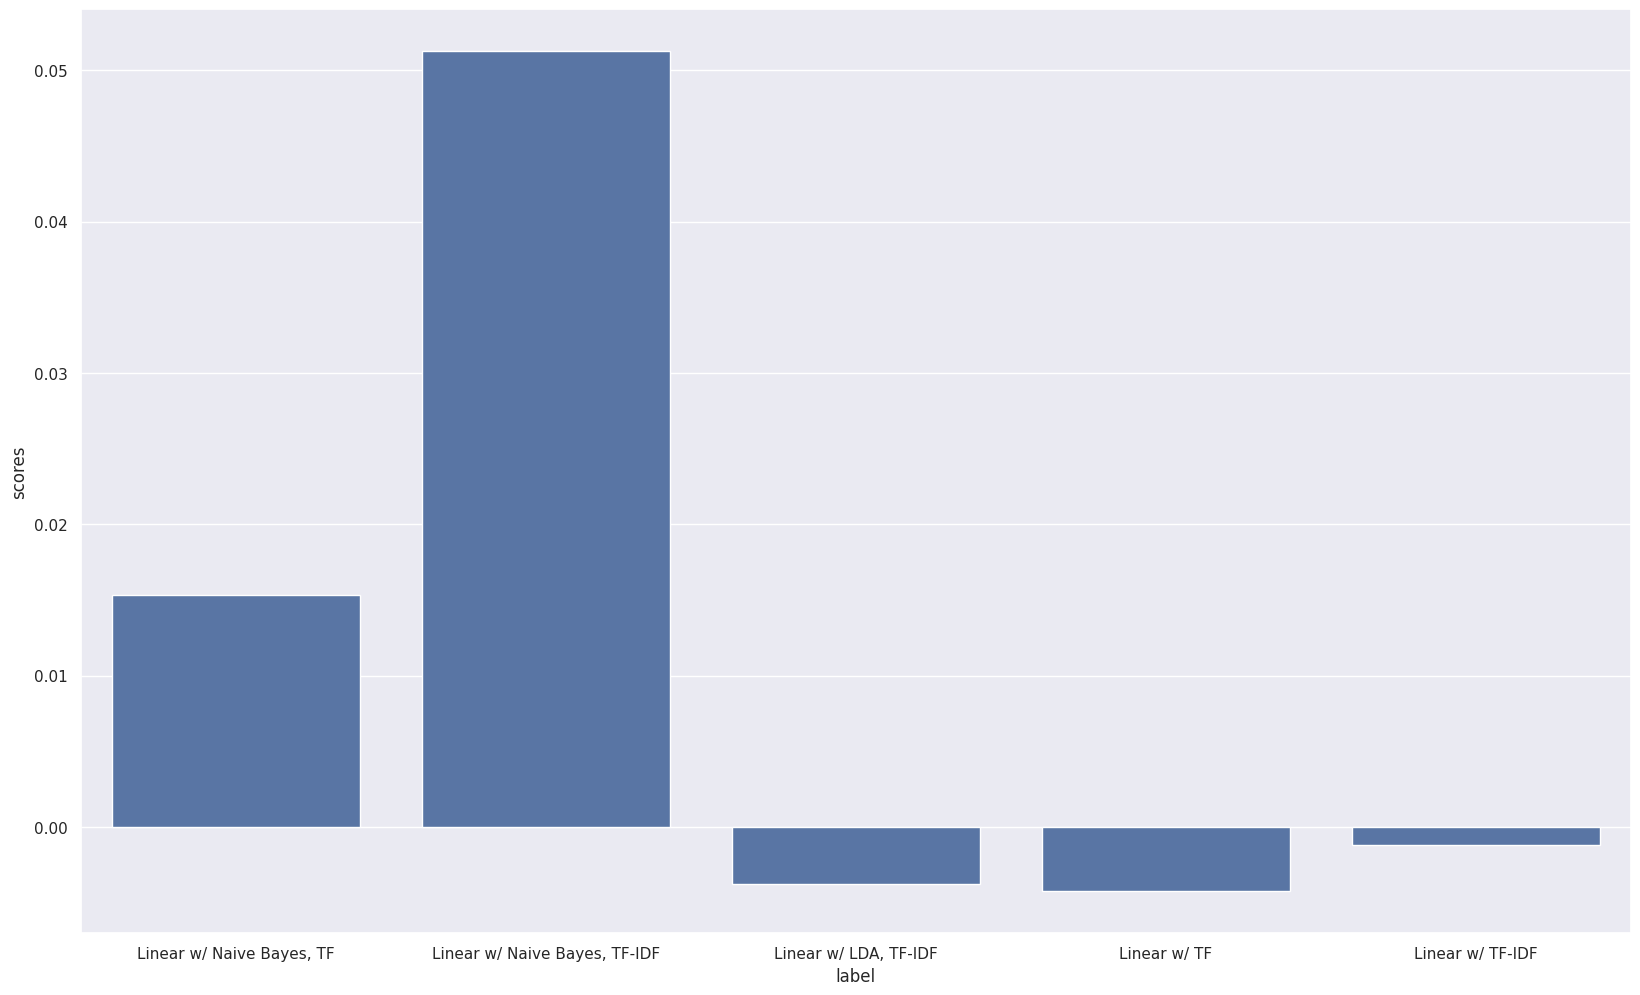

In [138]:
import seaborn as sns
print(model_scores)
model_scores_df = pd.DataFrame({
    'label': ['Linear w/ Naive Bayes, TF', 'Linear w/ Naive Bayes, TF-IDF', 'Linear w/ LDA, TF-IDF', 'Linear w/ TF', 'Linear w/ TF-IDF'],
    'scores': model_scores
})

# Plot the best results of each evaluated model
plt.figure(figsize=(20,12))  # set plot size (denoted in inches) Source: https://stackoverflow.com/questions/59447378/sklearn-plot-tree-plot-is-too-small
sns.barplot(data=model_scores_df, x='label', y='scores')

### Discussion

The best-scoring model was the linear regression model that uses Naive Bayes and TF-IDF to transform the features. Both model pipelines that use Naive Bayes to transform the features outperform the pipelines that do not use it. This suggests that including genre information improves the quality of the prediction. This is explored in the next section of this notebook.

## Genre Analysis

The analysis in this section uses genres as the explanatory variables instead of film descriptions. Film descriptions are not considered at all in this section.



In [139]:
import pandas as pd

In [140]:
# Load the cleaned dataset
filepath = 'https://raw.githubusercontent.com/anthonybrown0528/csc-442-course-project/refs/heads/main/dataset/clean/hw6/netflix_film_imdb_scores_cleaned_descriptions_df.csv'
df = pd.read_csv(filepath)

In [141]:
df.head()

,title,description_x,release_year,runtime,imdb_id,imdb_score,imdb_votes,show_id,type,director,...,country,date_added,age_certification,num_releases,listed_in,description_y,num_listed_in,first_cast,cast_freq_mean,genre_freq_mean
0,Monty Python and the Holy Grail,King Arthur accompany squire recruit Knights R...,1975,91,tt0071853,8.2,530877,s4218,Movie,"Terry Gilliam, Terry Jones",...,United Kingdom,"January 2, 2019",PG,1,"Action & Adventure, Classic Movies, Comedies",The Monty Python comedy clan skewers King Arth...,3,Graham Chapman,10.888889,831.000000
1,My Fair Lady,snobbish phonetics professor agree wager take ...,1964,170,tt0058385,7.8,94121,s1127,Movie,George Cukor,...,United States,"April 1, 2021",G,1,"Classic Movies, Music & Musicals",When a Cockney flower girl takes elocution les...,2,Audrey Hepburn,1.083333,203.500000
2,The Blue Lagoon,Two small child ship cook survive shipwreck fi...,1980,104,tt0080453,5.8,69053,s176,Movie,Randal Kleiser,...,United States,"September 1, 2021",R,1,"Dramas, Romantic Movies","Two shipwrecked children, stranded for years o...",2,Brooke Shields,1.375000,1446.500000
3,Bonnie and Clyde,In 1930s bore waitress Bonnie Parker fall love...,1967,110,tt0061418,7.7,111189,s6359,Movie,Arthur Penn,...,United States,"January 1, 2021",R,1,"Action & Adventure, Classic Movies, Dramas","Bonnie Parker and Clyde Barrow are young, in l...",3,Warren Beatty,1.777778,1076.333333
4,The Guns of Navarone,team allied saboteur assign impossible mission...,1961,158,tt0054953,7.5,50150,s178,Movie,J. Lee Thompson,...,"United Kingdom, United States","September 1, 2021",TV-14,1,"Action & Adventure, Classic Movies","During World War II, British forces launch an ...",2,Gregory Peck,1.300000,459.500000


In [142]:
# Select part of the dataset
column_subset = ['title', 'release_year', 'listed_in', 'description_x', 'imdb_score']
query_df = df[column_subset].copy()

# Create a binary column for classification
query_df['score_above_threshold'] = df['imdb_score'] > 6
query_df

,title,release_year,listed_in,description_x,imdb_score,score_above_threshold
0,Monty Python and the Holy Grail,1975,"Action & Adventure, Classic Movies, Comedies",King Arthur accompany squire recruit Knights R...,8.2,True
1,My Fair Lady,1964,"Classic Movies, Music & Musicals",snobbish phonetics professor agree wager take ...,7.8,True
2,The Blue Lagoon,1980,"Dramas, Romantic Movies",Two small child ship cook survive shipwreck fi...,5.8,False
3,Bonnie and Clyde,1967,"Action & Adventure, Classic Movies, Dramas",In 1930s bore waitress Bonnie Parker fall love...,7.7,True
4,The Guns of Navarone,1961,"Action & Adventure, Classic Movies",team allied saboteur assign impossible mission...,7.5,True
...,...,...,...,...,...,...
2472,Myriam Fares: The Journey,2021,"Documentaries, International Movies, Music & M...",From pregnancy album preparation Lebanese sing...,2.3,False
2473,The Tambour of Retribution,2021,"Dramas, International Movies, Romantic Movies",son swordsman fall love daughter Tagaga social...,6.9,True
2474,Pitta Kathalu,2021,"International TV Shows, TV Dramas",Four different woman four journey love betraya...,5.1,False
2475,Loyiso Gola: Unlearning,2021,Stand-Up Comedy,South African comedian Loyiso Gola serve filte...,5.9,False


In [143]:
from sklearn.model_selection import train_test_split

In [144]:
# Split the dataset into a training and test set
train_set, test_set = train_test_split(query_df, test_size=0.3, random_state=42)

In [145]:
features = ['genre']

In [146]:
# Separate genres with spaces instead of commas
def concat_genres(data):
  return ' '.join(data.to_list())

In [147]:
"""
Create records for (movie, genre) pair as above
"""

def separate_genre_df(data):
  movie_genre_map = {
      'title': [],
      'release_year': [],
      'genre': [],
      'imdb_score': [],
      'score_above_threshold': [],
      'description': []
  }

  for _, row in data.iterrows():

    # Separate genres
    genres = row['listed_in'].split(',')

    # Create records
    for genre in genres:
      movie_genre_map['title'].append(row['title'].strip())
      movie_genre_map['release_year'].append(row['release_year'])
      movie_genre_map['genre'].append(genre.strip().replace(' ', '_'))
      movie_genre_map['imdb_score'].append(row['imdb_score'])
      movie_genre_map['score_above_threshold'].append(row['score_above_threshold'])
      movie_genre_map['description'].append(row['description_x'])


  movie_genre_df = pd.DataFrame(movie_genre_map)

  movie_genre_df = movie_genre_df[movie_genre_df['genre'] != 'International Movies']
  movie_genre_df = movie_genre_df[movie_genre_df['genre'] != 'International TV Shows']

  movie_genre_df

  return movie_genre_df

data_cleaned_df = separate_genre_df(query_df)

movie_genre_concat_df = data_cleaned_df[['title', 'release_year', 'genre']].groupby(by=['title', 'release_year'], as_index=False).agg(concat_genres)
data_cleaned_genre_list_df = pd.merge(data_cleaned_df.drop(columns=['genre']).drop_duplicates(), movie_genre_concat_df.rename(columns={'genre': 'genres'}), how='inner', on=['title', 'release_year'])

feature_df = data_cleaned_genre_list_df['genres'].values
target_df = data_cleaned_genre_list_df['score_above_threshold'].values

data_cleaned_genre_list_df

,title,release_year,imdb_score,score_above_threshold,description,genres
0,Monty Python and the Holy Grail,1975,8.2,True,King Arthur accompany squire recruit Knights R...,Action_&_Adventure Classic_Movies Comedies
1,My Fair Lady,1964,7.8,True,snobbish phonetics professor agree wager take ...,Classic_Movies Music_&_Musicals
2,The Blue Lagoon,1980,5.8,False,Two small child ship cook survive shipwreck fi...,Dramas Romantic_Movies
3,Bonnie and Clyde,1967,7.7,True,In 1930s bore waitress Bonnie Parker fall love...,Action_&_Adventure Classic_Movies Dramas
4,The Guns of Navarone,1961,7.5,True,team allied saboteur assign impossible mission...,Action_&_Adventure Classic_Movies
...,...,...,...,...,...,...
2472,Myriam Fares: The Journey,2021,2.3,False,From pregnancy album preparation Lebanese sing...,Documentaries International_Movies Music_&_Mus...
2473,The Tambour of Retribution,2021,6.9,True,son swordsman fall love daughter Tagaga social...,Dramas International_Movies Romantic_Movies
2474,Pitta Kathalu,2021,5.1,False,Four different woman four journey love betraya...,International_TV_Shows TV_Dramas
2475,Loyiso Gola: Unlearning,2021,5.9,False,South African comedian Loyiso Gola serve filte...,Stand-Up_Comedy


In [148]:
# Identify the distribution of labels
data_cleaned_genre_list_df['score_above_threshold'].value_counts()

,count
score_above_threshold,
True,1611
False,866


### Discussion

The ratio of scores above the threshold over the total count is roughly 65%. If a model achieves an accuracy close to that, then it likely does no better than guessing the positive label for all data points.

In [149]:
X_train = data_cleaned_genre_list_df['genres'].values
y_train = data_cleaned_genre_list_df['score_above_threshold'].values

In [150]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [151]:
model_score_map = {
    'model': [],
    'score': [],
    'type': []
}

In [152]:
# Create a classification pipeline
pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('estimator', DecisionTreeClassifier())
])

# Specify hyperparameters to tune
grid_search = GridSearchCV(
    pipeline,
    param_grid={
        'estimator__max_depth': [1, 2, 3, 4, 5]
    })

grid_search = grid_search.fit(X_train, y_train)

# Get the best model for classification
vectorizer = grid_search.best_estimator_['vectorizer']
estimator_opt = grid_search.best_estimator_['estimator']

cv_results_df = pd.DataFrame(grid_search.cv_results_)

# Store the model performance
model_score_map['model'].append('Decision Tree w/ TF')
model_score_map['score'].append(float(cv_results_df[cv_results_df['rank_test_score'] == 1]['mean_test_score'].iloc[0]))
model_score_map['type'].append('clf')

cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012759,0.002966,0.003870,0.000567,1,{'estimator__max_depth': 1},0.635081,0.647177,0.676768,0.650505,0.668687,0.655644,0.015082,5
1,0.012172,0.001064,0.004296,0.000713,2,{'estimator__max_depth': 2},0.703629,0.697581,0.709091,0.688889,0.701010,0.700040,0.006725,4
2,0.011716,0.001835,0.003767,0.000380,3,{'estimator__max_depth': 3},0.659274,0.701613,0.709091,0.737374,0.701010,0.701672,0.025011,2
3,0.011506,0.000761,0.003489,0.000188,4,{'estimator__max_depth': 4},0.665323,0.693548,0.709091,0.737374,0.696970,0.700461,0.023374,3
4,0.012046,0.000546,0.003483,0.000247,5,{'estimator__max_depth': 5},0.673387,0.703629,0.719192,0.735354,0.701010,0.706514,0.020632,1


In [153]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

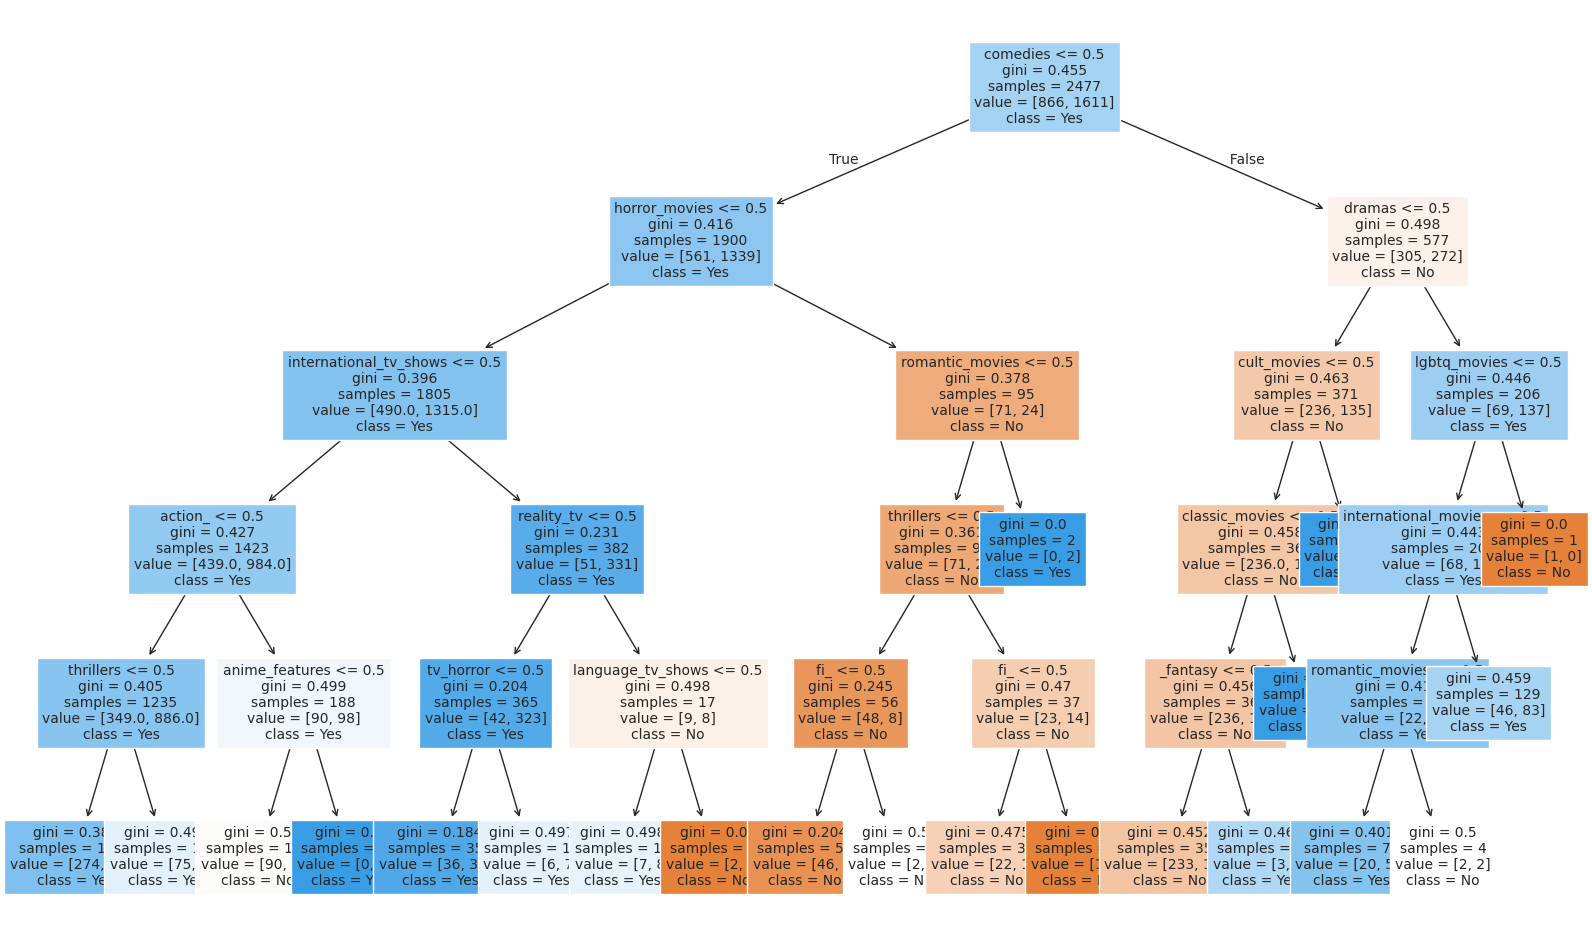

In [154]:
# Plot the decision tree structure
plt.figure(figsize=(20,12))  # set plot size (denoted in inches) Source: https://stackoverflow.com/questions/59447378/sklearn-plot-tree-plot-is-too-small
plot_tree(estimator_opt, class_names=['No', 'Yes'], feature_names=vectorizer.get_feature_names_out(), filled = True, fontsize=10);

### Discussion

Whether a film is a comedy, horror, or drama seems to best separate the film that score above and below an IMDb rating of 6. Looking at the first 2 levels. Films that are neither comedies nor horror movies tend to score above the threshold compared to those that do not. However, the first split is unbalanced.

In [155]:
# Create a pipelien with TF-IDF
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('estimator', DecisionTreeClassifier())
])

# Specify hyperparameters
grid_search = GridSearchCV(
    pipeline,
    param_grid={
        'estimator__max_depth': [1, 2, 3, 4, 5, 10, 20, 30]
    })

grid_search = grid_search.fit(X_train, y_train)

# Get the best model
vectorizer = grid_search.best_estimator_['vectorizer']
estimator_opt = grid_search.best_estimator_['estimator']

cv_results_df = pd.DataFrame(grid_search.cv_results_)

# Store the model performance
model_score_map['model'].append('Decision Tree w/ TF-IDF')
model_score_map['score'].append(float(cv_results_df[cv_results_df['rank_test_score'] == 1]['mean_test_score'].iloc[0]))
model_score_map['type'].append('clf')

cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.014657,0.003459,0.005499,0.001940,1,{'estimator__max_depth': 1},0.641129,0.651210,0.674747,0.682828,0.668687,0.663720,0.015351,8
1,0.012387,0.001060,0.004086,0.000529,2,{'estimator__max_depth': 2},0.709677,0.699597,0.705051,0.725253,0.696970,0.707309,0.009991,5
2,0.011979,0.000518,0.003970,0.000307,3,{'estimator__max_depth': 3},0.711694,0.703629,0.715152,0.725253,0.709091,0.712964,0.007205,2
3,0.013895,0.002327,0.004455,0.001020,4,{'estimator__max_depth': 4},0.709677,0.695565,0.715152,0.745455,0.709091,0.714988,0.016544,1
4,0.012317,0.000101,0.003899,0.000227,5,{'estimator__max_depth': 5},0.687500,0.705645,0.713131,0.743434,0.703030,0.710548,0.018439,3
5,0.015276,0.001506,0.004226,0.000508,10,{'estimator__max_depth': 10},0.697581,0.691532,0.707071,0.751515,0.696970,0.708934,0.021870,4
6,0.017157,0.000946,0.004124,0.000289,20,{'estimator__max_depth': 20},0.683468,0.691532,0.707071,0.731313,0.692929,0.701263,0.016838,6
7,0.017625,0.000366,0.003953,0.000071,30,{'estimator__max_depth': 30},0.677419,0.691532,0.709091,0.727273,0.686869,0.698437,0.017710,7


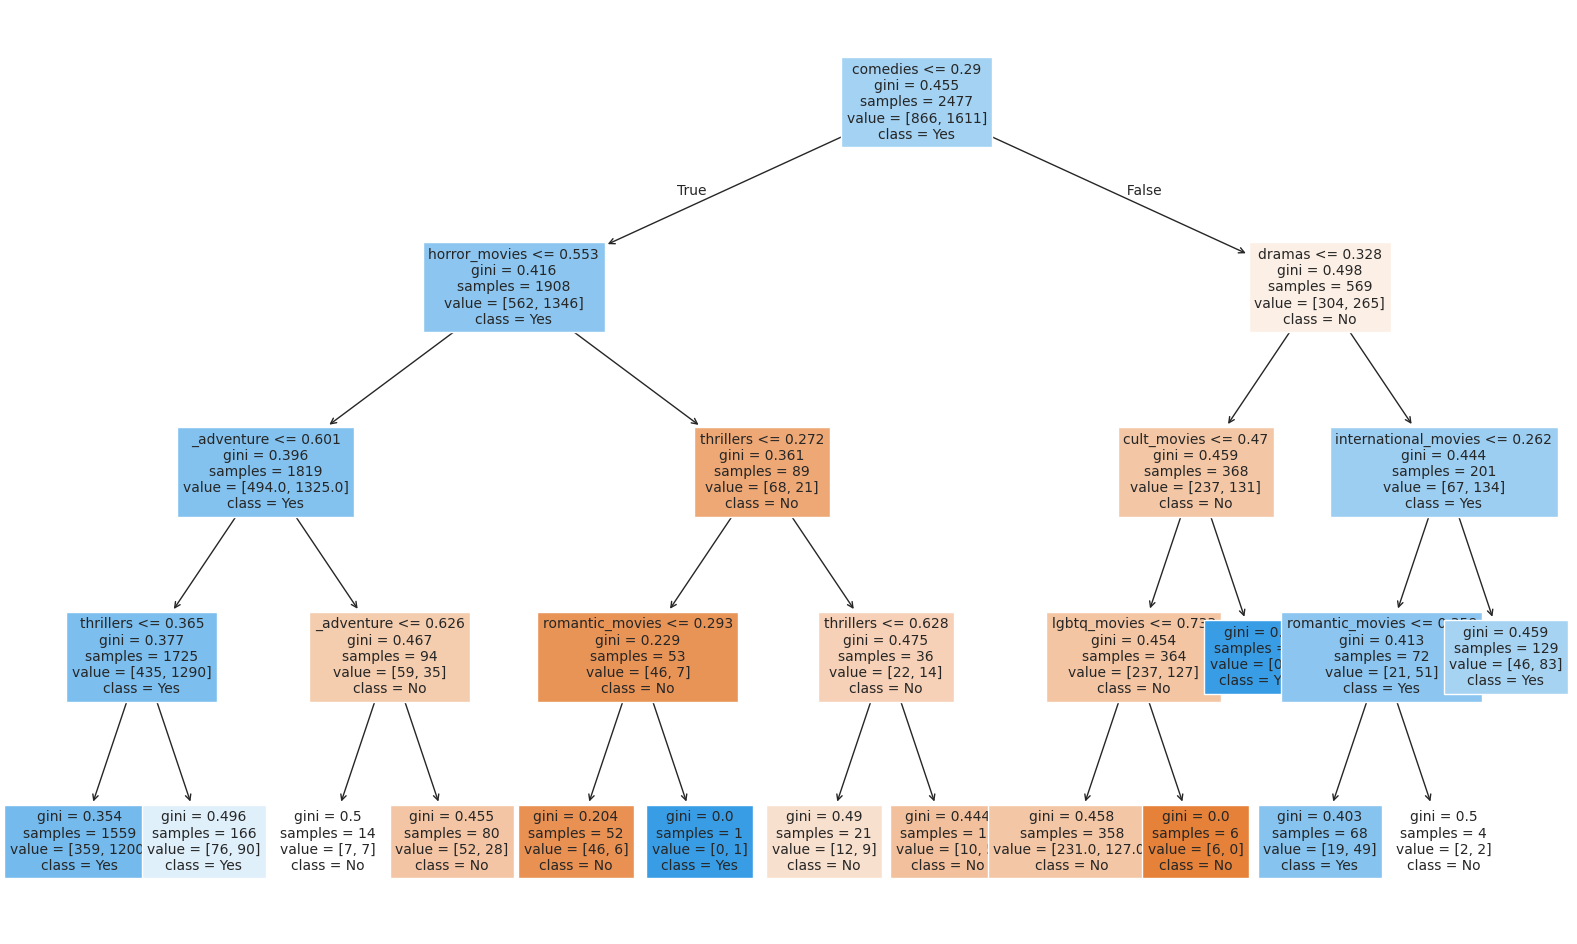

In [156]:
# Plot the decision tree structure
plt.figure(figsize=(20,12))  # set plot size (denoted in inches) Source: https://stackoverflow.com/questions/59447378/sklearn-plot-tree-plot-is-too-small
plot_tree(estimator_opt, class_names=['No', 'Yes'], feature_names=vectorizer.get_feature_names_out(), filled = True, fontsize=10);

### Discussion

Rules associated with comedies, horror movies, and dramas remain near the top of the decision tree with the same interpretation as the previous decision tree. The accuracy of both models are very similar.

In [157]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

In [158]:
# Create a regression model
pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('estimator', LinearRegression())
])

X = data_cleaned_genre_list_df['genres'].values
y = data_cleaned_genre_list_df['imdb_score'].values

# Perform 5-fold cross validation
_, _, estimator, test_score = cross_validate(pipeline, X, y, return_estimator=True).items()
test_scores_df = pd.DataFrame({
    test_score[0]: test_score[1]
})

# Store the model performance
best_model_idx = np.argmax(test_scores_df[test_score[0]].values)

model_score_map['model'].append('Linear Regression w/ TF')
model_score_map['score'].append(float(test_score[1].mean()))
model_score_map['type'].append('reg')

In [159]:
test_scores_df

,test_score
0,0.037649
1,0.176150
2,0.150112
3,0.219762
4,0.133190


In [160]:
import seaborn as sns

<Axes: xlabel='genre', ylabel='coef'>

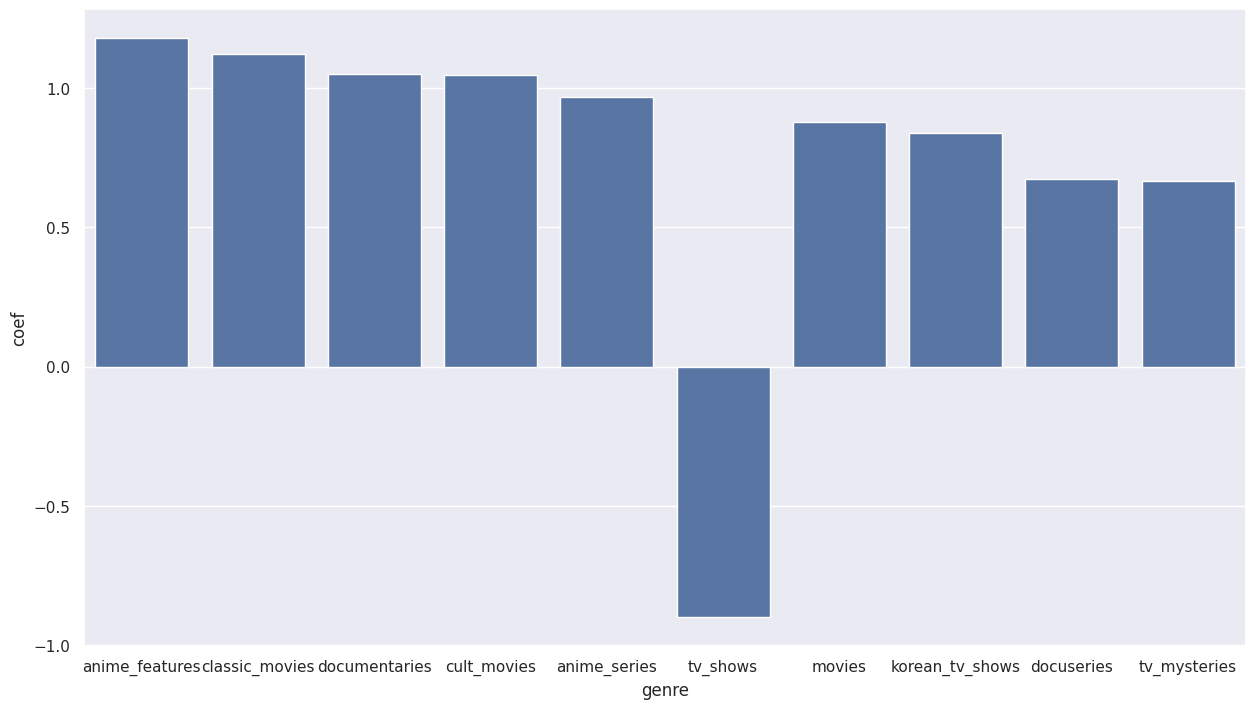

In [161]:
# Plot the genres and their significance based on
# linear regression coefficients
coefs = estimator[1][best_model_idx]['estimator'].coef_
genre_labels = estimator[1][best_model_idx]['vectorizer'].get_feature_names_out()

coef_df = pd.DataFrame({'coef': coefs, 'genre': genre_labels})
coef_df['abs_coef'] = np.abs(coef_df['coef'])

coef_df_significant = coef_df.sort_values(by='abs_coef', ascending=False).head(10)

sns.set_theme(rc={'figure.figsize':(15,8.27)})
sns.barplot(coef_df_significant, x='genre', y='coef')

### Discussion

The results of this regression model shows categories such as Anime and classic movies to be positively associated with IMDb score. Curiously, classic movies were previously associated with lower IMDb scores when looking at the description column with IMdb score. The tag "TV Shows" is negatively associated while "Korean TV Shows" is positively related. This might indicate user preferences for content distributed from South Korea.

In [162]:
# Create a regression model
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('estimator', LinearRegression())
])

X = data_cleaned_genre_list_df['genres'].values
y = data_cleaned_genre_list_df['imdb_score'].values

# Perform 5-fold cross validation
_, _, estimator, test_score = cross_validate(pipeline, X, y, return_estimator=True).items()
test_scores_df = pd.DataFrame({
    test_score[0]: test_score[1]
})

# Store the model performance
best_model_idx = np.argmax(test_scores_df[test_score[0]].values)

model_score_map['model'].append('Linear Regression w/ TF-IDF')
model_score_map['score'].append(float(test_score[1].mean()))
model_score_map['type'].append('reg')

In [163]:
test_scores_df

,test_score
0,0.049469
1,0.177176
2,0.154390
3,0.240248
4,0.138357


In [164]:
test_scores_df.mean()

,0
test_score,0.151928


<Axes: xlabel='genre', ylabel='coef'>

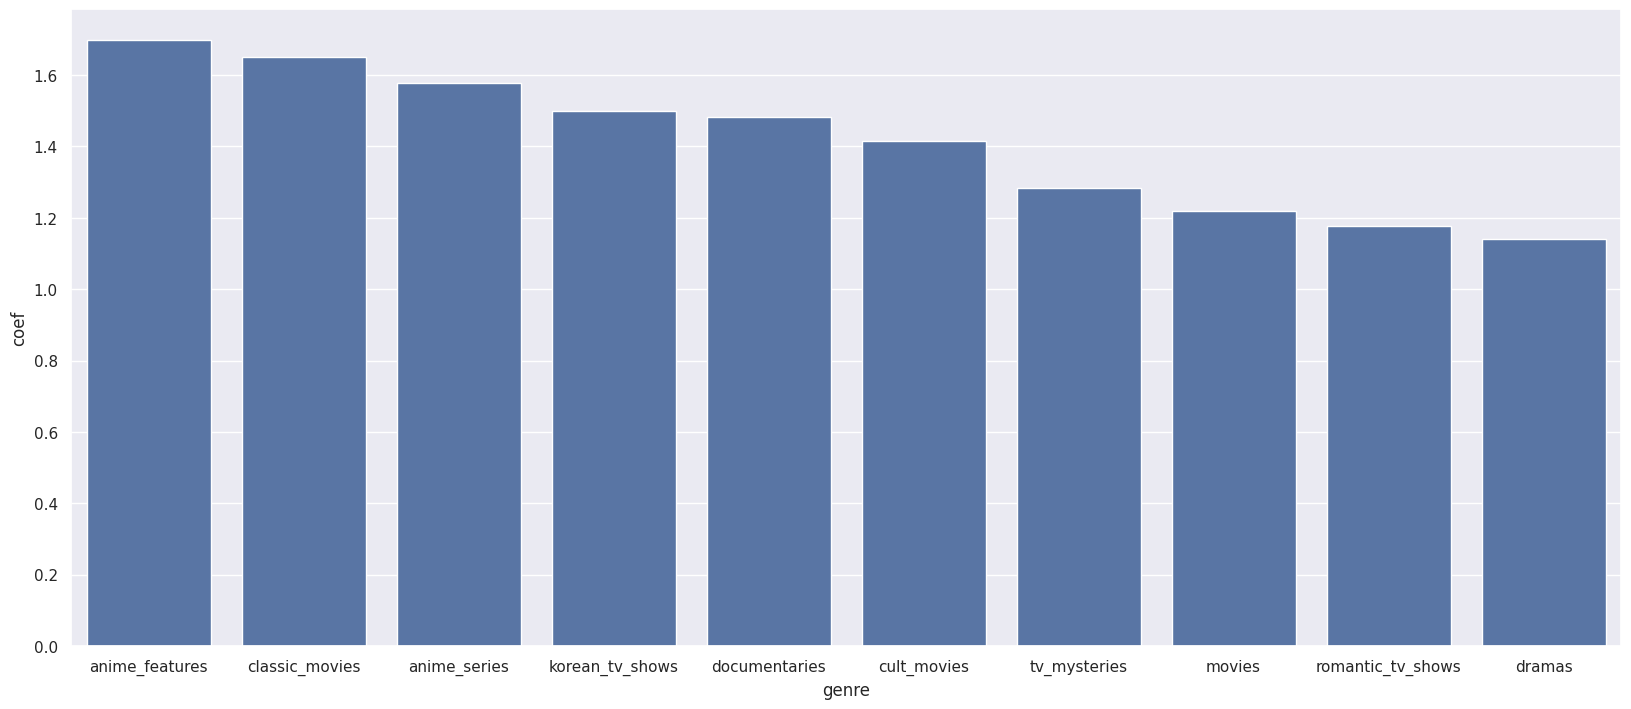

In [165]:
# Retrieve the learned parameters of the linear model
coefs = estimator[1][best_model_idx]['estimator'].coef_
genre_labels = estimator[1][best_model_idx]['vectorizer'].get_feature_names_out()

# Identify the significant genres based on the magnitude of the coefficients
coef_df = pd.DataFrame({'coef': coefs, 'genre': genre_labels})
coef_df['abs_coef'] = np.abs(coef_df['coef'])

coef_df_significant = coef_df.sort_values(by='abs_coef', ascending=False).head(10)

# Plot the 10 most significant genres
sns.set_theme(rc={'figure.figsize':(20,8.27)})
sns.barplot(coef_df_significant, x='genre', y='coef')

### Discussion

The results here similarly show Anime and Classic movies to be positively related to IMDb score. The major difference betweeen this model and the previous one is the absence of "TV Show" as a significant predictor of IMDb score.

In [166]:
from sklearn.linear_model import Lasso, Ridge

In [167]:
# Set up a pipeline with L1 regularization
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('estimator', Lasso())
])

X = data_cleaned_genre_list_df['genres'].values
y = data_cleaned_genre_list_df['imdb_score'].values

# Specify the hyperparameters
grid_search = GridSearchCV(pipeline, param_grid={
    'estimator__alpha': [0.001, 0.01, 0.1]
})
grid_search = grid_search.fit(X, y)

cv_results_df = pd.DataFrame(grid_search.cv_results_)

# Store the model performance
model_score_map['model'].append('Lasso w/ TF-IDF')
model_score_map['score'].append(float(cv_results_df[cv_results_df['rank_test_score'] == 1]['mean_test_score'].iloc[0]))
model_score_map['type'].append('reg')

cv_results_df[['mean_test_score', 'std_test_score', 'rank_test_score']]

,mean_test_score,std_test_score,rank_test_score
0,0.145887,0.074507,1
1,0.112726,0.063753,2
2,-0.031582,0.023603,3


<Axes: xlabel='genre', ylabel='coef'>

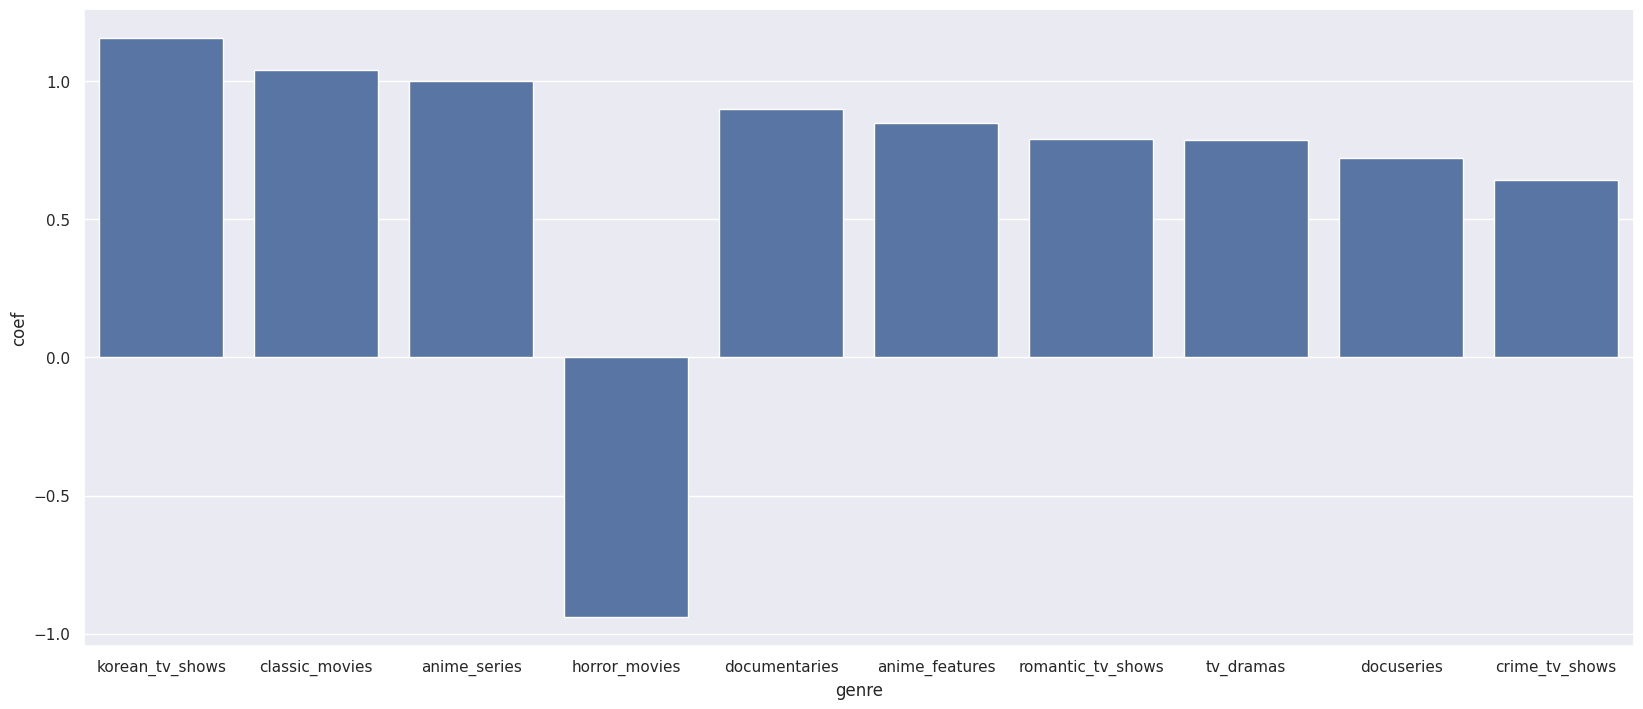

In [168]:
# Retrieve the learned parameters of the linear model
coefs = grid_search.best_estimator_['estimator'].coef_
genre_labels = grid_search.best_estimator_['vectorizer'].get_feature_names_out()

# Identify the significant genres based on the magnitude of the coefficients
coef_df = pd.DataFrame({'coef': coefs, 'genre': genre_labels})
coef_df['abs_coef'] = np.abs(coef_df['coef'])

coef_df_significant = coef_df.sort_values(by='abs_coef', ascending=False).head(10)

# Plot the 10 most significant genres
sns.set_theme(rc={'figure.figsize':(20,8.27)})
sns.barplot(coef_df_significant, x='genre', y='coef')

### Discussion

The results of this model suggests that horror movies are negatively associated with IMDb scores which matches the results of the fitted classifiers. This could be related to the prevalence of older horror movies produced with lower budgets and marketed toward niche audiences.

In [169]:
# Set up a pipeline with L2 regularization
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('estimator', Ridge())
])

X = data_cleaned_genre_list_df['genres'].values
y = data_cleaned_genre_list_df['imdb_score'].values

# Specify the hyperparameters
grid_search = GridSearchCV(pipeline, param_grid={
    'estimator__alpha': [0.001, 0.01, 0.1, 0.2, 0.5]
})
grid_search = grid_search.fit(X, y)

cv_results_df = pd.DataFrame(grid_search.cv_results_)

# Store the model performance
model_score_map['model'].append('Ridge w/ TF-IDF')
model_score_map['score'].append(float(cv_results_df[cv_results_df['rank_test_score'] == 1]['mean_test_score'].iloc[0]))
model_score_map['type'].append('reg')

cv_results_df[['mean_test_score', 'std_test_score', 'rank_test_score']]

,mean_test_score,std_test_score,rank_test_score
0,0.151939,0.061805,1
1,0.151896,0.061982,2
2,0.151516,0.063554,3
3,0.151171,0.064964,4
4,0.150468,0.067808,5


<Axes: xlabel='genre', ylabel='coef'>

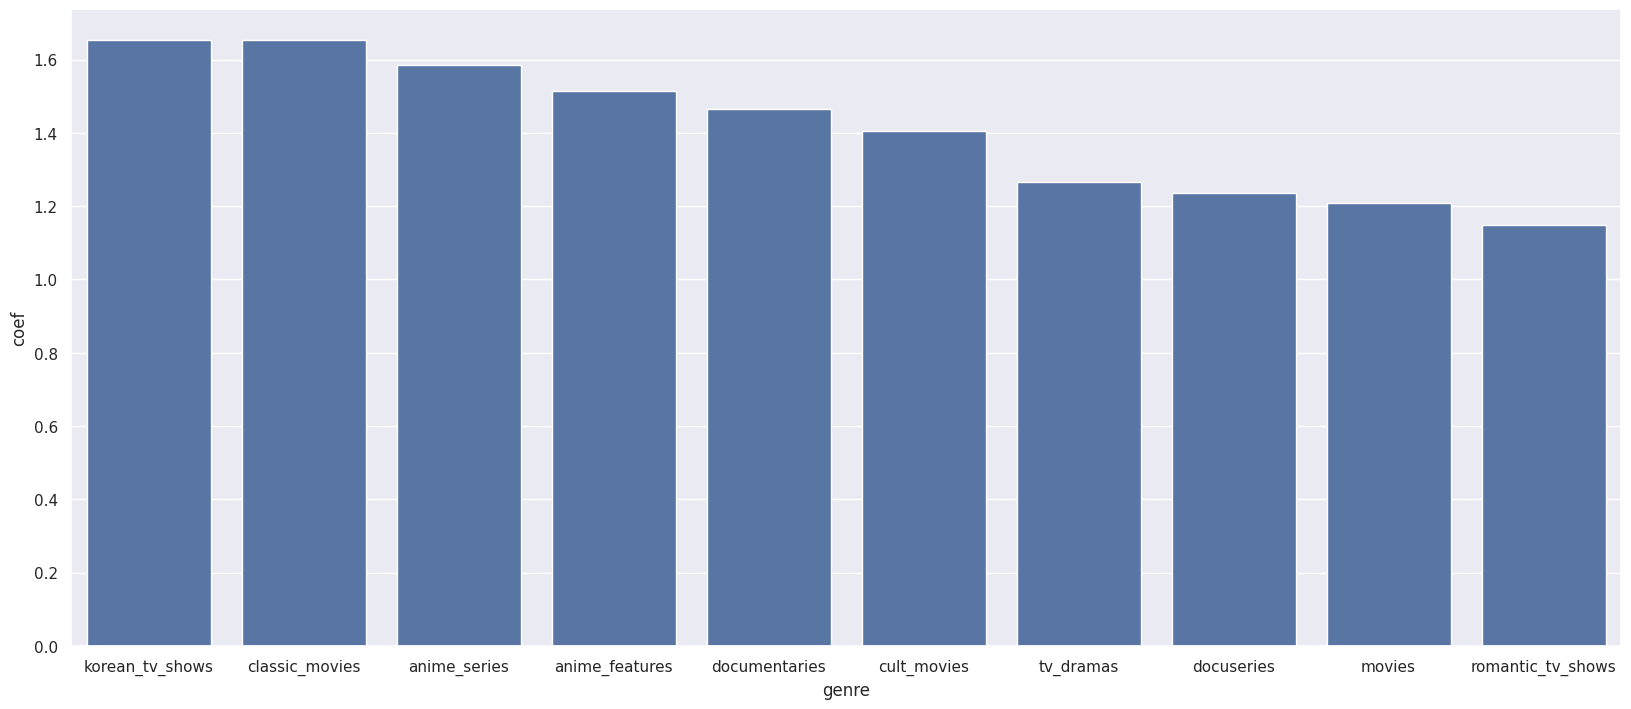

In [170]:
# Retrieve the learned parameters of the linear model
coefs = grid_search.best_estimator_['estimator'].coef_
genre_labels = grid_search.best_estimator_['vectorizer'].get_feature_names_out()

# Identify the significant genres based on the magnitude of the coefficients
coef_df = pd.DataFrame({'coef': coefs, 'genre': genre_labels})
coef_df['abs_coef'] = np.abs(coef_df['coef'])

coef_df_significant = coef_df.sort_values(by='abs_coef', ascending=False).head(10)

# Plot the 10 most significant genres
sns.set_theme(rc={'figure.figsize':(20,8.27)})
sns.barplot(coef_df_significant, x='genre', y='coef')

The interpretation of this model could be that Korean films are quite popular. This could be related to the success of films such as Squid Game and Sweet Home as well as the prevalence of K-dramas on Netflix.

In [171]:
model_score_df = pd.DataFrame(model_score_map)
import seaborn as sns

<Axes: xlabel='model', ylabel='score'>

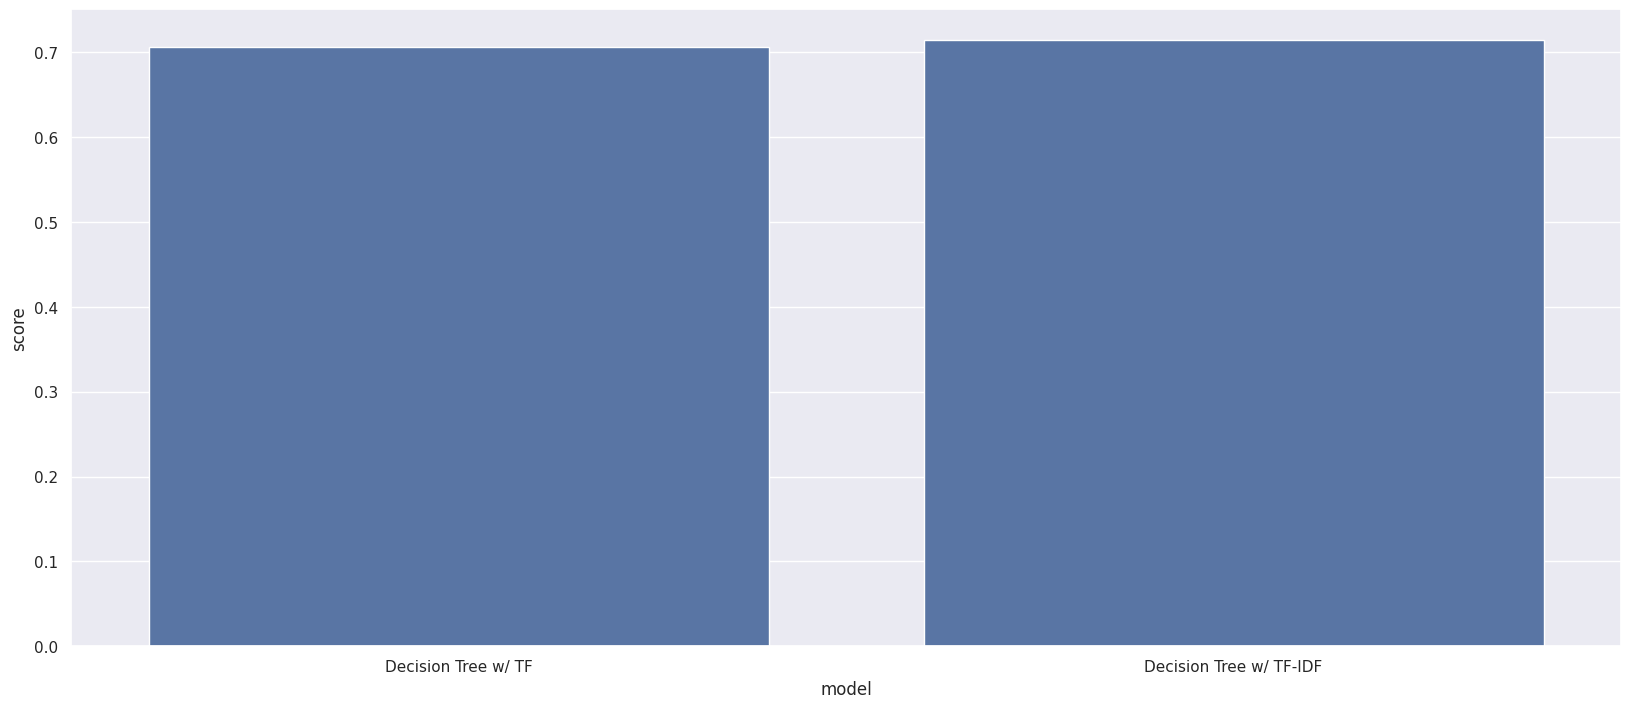

In [172]:
# Compare the classifier models
sns.barplot(model_score_df[model_score_df['type'] == 'clf'], x='model', y='score')

### Discussion

Both trained classifiers performed equally as well on the validation data. The accuracies for both are roughly 70% which is not different from the 65% of positive target labels. This suggests that both models are similar to a model that simply outputs the positive label and neither would likely generalize well to a different dataset.

                         model     score type
0          Decision Tree w/ TF  0.706514  clf
1      Decision Tree w/ TF-IDF  0.714988  clf
2      Linear Regression w/ TF  0.143372  reg
3  Linear Regression w/ TF-IDF  0.151928  reg
4              Lasso w/ TF-IDF  0.145887  reg
5              Ridge w/ TF-IDF  0.151939  reg


<Axes: xlabel='model', ylabel='score'>

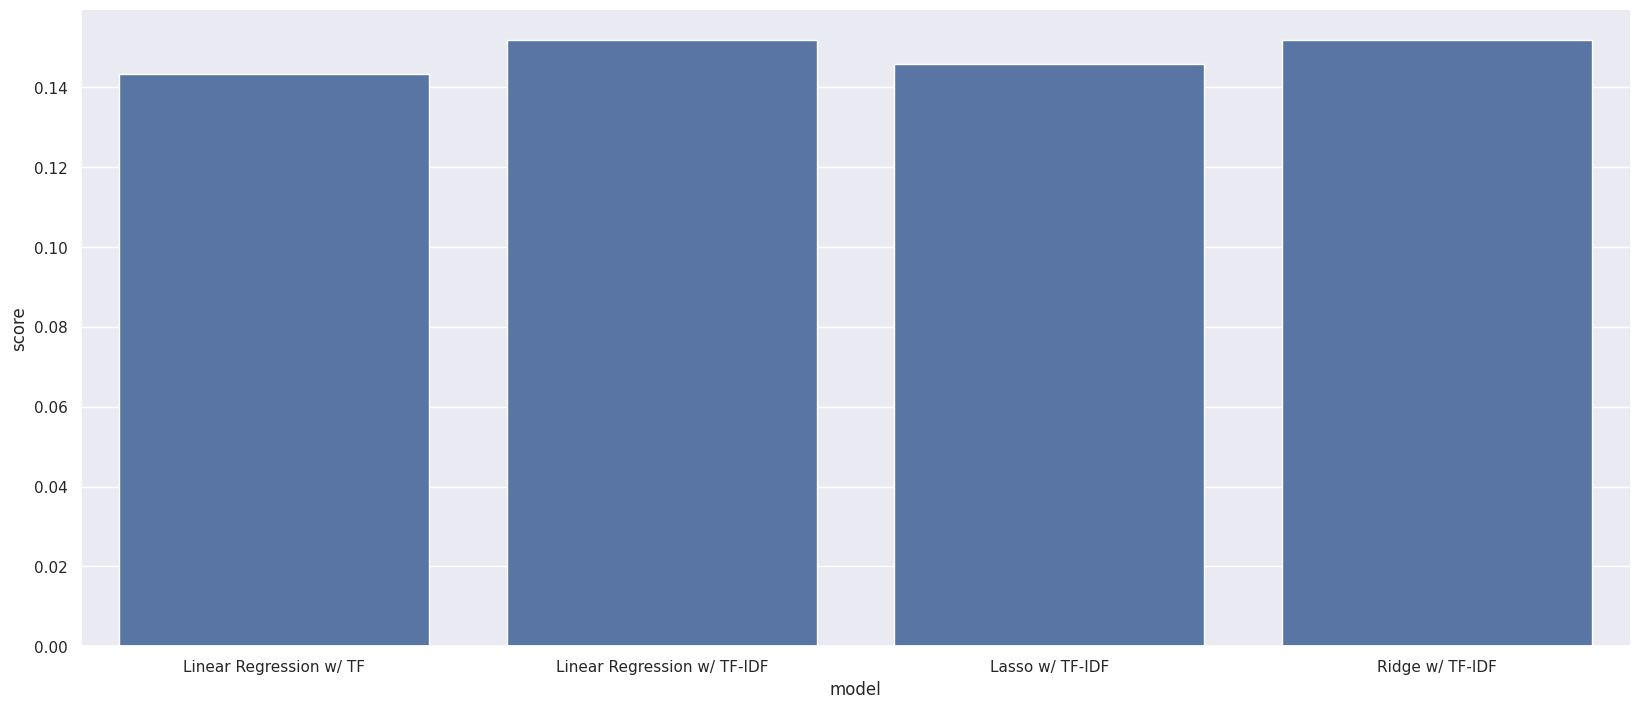

In [173]:
# Compare the regression models
print(model_score_df)
sns.barplot(model_score_df[model_score_df['type'] == 'reg'], x='model', y='score')

### Discussion

From the regression models evaluated, the linear regression model with the TF-IDF transformaton of the genres performed best out of all of the models considered, including the models that relied on the description data as well. This might suggest that description is too noisy or inconsistent to glean reliable insights from the data. However, genre information was most useful, albeit, still relatively weak.